**Data Validation**

This data set has 947 rows, 8 columns. I have validated all variables and I have made some changes after validation.

1. recipe: recipe is the unique numeric identifier as described in the data dictionary. The values range sequentially from 1 to 947 without missing values. Type of variable is integer. No cleaning is needed
   
2. category:  category is the type of recipe. Unlike expected, it consists of 11 unique groups without missing values. Additionally, the chicken breast group was identified. As a result, category names are Pork,Potato, Breakfast, Beverages, One Dish Meal, Chicken Breast, Lunch/Snacks, Chicken, Vegetable, Meat and Dessert. Object type of variable of the dataframe converted to nominal category type.
   
3. servings: Number of servings for the recipe.In the dataframe this variable appears as an object without missing values, which should be numeric. It has also some inconsistent records like '4 as a snack', '6 as a snack'. In order to clean the data, the inconsistent records were first replaced with their numerical equivalents and then converted to integer. After cleaning stage, serving groups are 1, 2, 4 and 6. We can call this variable as numerical categorical variable
   
4. high_traffic: in the data dictionary it described as "if the traffic to the site was high when this recipe was shown, this is marked with 'High' ". 
   - Values defined as 'High' were seen. Additionally, missing NaN values detected. 
   - There are 574 High Values and 373 NaN (missing) values.
   - In this case, it seems that the NaN values here represent normal traffic. Therefore, I filled the NaN values to Normal for now. In the following stages it will be our target variable, I will apply the preprocessing step to this   column again.
   - As a result, There are 574 High traffic values and 373 Normal traffic values. 
  
5. calories: Numeric number of calories per serving as expected. But it has 52 missing values. Type of variable is float64.
   
6. carbohydrate: Numeric, amount of carbohydrates in grams per serving as expected. But it has 52 missing values. Type of variable is float64.
   
7. sugar: Numeric, amount of sugar in grams per serving as expected. But it has 52 missing values. Type of variable is float64.

8. protein: Numeric, amount of protein in grams per serving as expected. But it has 52 missing values. Type of variable is float64.

Missing values that occurred simultaneously in items 5, 6, 7 and 8 were detected. For this reason, calories, carbohydrate, sugar and protein variables were evaluated together.

Conclusion:

- Missing data were examined categorically and on a target variable basis. According to this;
1. Missing data occurred simultaneously in the variables calories, carbohydrate, sugar and protein and is in 52 rows.
2. Missing data occurred in the categories Pork,Potato, One Dish Meal, Chicken Breast, Lunch/Snacks, Chicken, Vegetable, Meat and Dessert. There is no missing data in the Breakfast and Beverages categories.
3. In the high_traffic variable, 39 of the missing data are in the High category and 13 of them are in the Normal category.

The reason why missing data are in certain categories and numerical variables are present at the same time may be due to a systematic error in the data collection phase in the relevant categories.

Since the missing data was in the calories, carbohydrate, sugar and protein variables at the same time, and because it was approximately 5% of the entire data set, and finally, deleting it would not affect the class balance in the target variable high_traffic, I cleaned these missing data by removing them from the data set. 

Finally, I validate whether there is any duplicated data

After the cleaning stage the cleaned data has 895 rows and 8 columns without missing values.

In [1]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import missingno as msno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold,train_test_split,GridSearchCV
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,roc_auc_score,roc_curve,auc,confusion_matrix,make_scorer,accuracy_score,recall_score,f1_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
pd.set_option("display.max_rows", None)
plt.style.use("ggplot")
sns.set_palette(sns.diverging_palette(220, 20))

In [2]:
df = pd.read_csv("data/recipe_site_traffic_2212.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [3]:
df.shape

(947, 8)

**1. Reecipe Variable**

In [4]:
# validate 947 unique values
df["recipe"].nunique()

947

**2. Category Variable**

In [5]:
# validate 11 categories
df["category"]= df["category"].astype("category")
df["category"].value_counts()

category
Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Dessert            83
Vegetable          83
Meat               79
Chicken            74
One Dish Meal      71
Name: count, dtype: int64

**3. Servings Variable:**

In [6]:
df["servings"].value_counts()

servings
4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: count, dtype: int64

In [7]:
# validate 1, 2, 4, 6 servings group
df["servings"].replace({"4 as a snack":"4","6 as a snack":"6"},inplace=True)
df["servings"] = df["servings"].astype(int)
df["servings"].value_counts()

servings
4    391
6    198
2    183
1    175
Name: count, dtype: int64

**4. High_traffic Variable**

In [8]:
df["high_traffic"].value_counts(dropna=False)

high_traffic
High    574
NaN     373
Name: count, dtype: int64

In [9]:
df["high_traffic"].fillna('Normal',inplace=True)
df["high_traffic"]= df["high_traffic"].astype("category")
df["high_traffic"].value_counts()

high_traffic
High      574
Normal    373
Name: count, dtype: int64

**5, 6, 7 and 8 Variables Missing Values Analysis**

In [10]:
df.isnull().sum()

recipe           0
calories        52
carbohydrate    52
sugar           52
protein         52
category         0
servings         0
high_traffic     0
dtype: int64

- Missing values occur simultaneously in calories, carbohydrate, sugar and protein variables of data

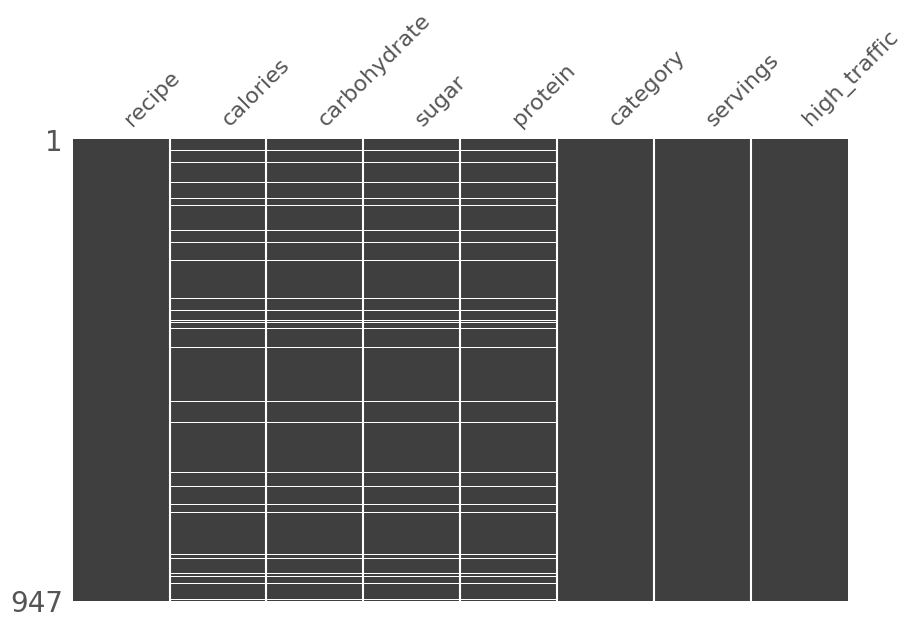

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))  
msno.matrix(df, ax=ax)  
plt.show()

- Validation that missing data occur simultaneously. Total count is 52

In [12]:
df.loc[df.select_dtypes(include="float64").isnull().all(axis=1),"category"].count()

52

- Category-based analysis of missing data

General category distribution: 
- Although the Breakfast vs Chicken Breast categories are at the forefront, the categories seem to be approximately balanced.

In [13]:
#Percentage distributions of categories
df["category"].value_counts(normalize=True) * 100

category
Breakfast         11.193242
Chicken Breast    10.348469
Beverages          9.714889
Lunch/Snacks       9.398099
Potato             9.292503
Pork               8.870116
Dessert            8.764520
Vegetable          8.764520
Meat               8.342133
Chicken            7.814150
One Dish Meal      7.497360
Name: proportion, dtype: float64

Category distribution of missing values: 
- It was determined that missing data was more in the Pork and Lunch/Snacks categories and there was no missing data in the Beverages and Breakfast categories.Additionally, the rate of categories with missing data is quite low compared to other categories.

In [14]:
#Percentage distributions of categories with missing numeric values
df.loc[df.select_dtypes(include="float64").isnull().all(axis=1),"category"].value_counts(normalize=True) * 100

category
Pork              21.153846
Lunch/Snacks      13.461538
Dessert           11.538462
Chicken            9.615385
Meat               9.615385
Potato             9.615385
Vegetable          9.615385
Chicken Breast     7.692308
One Dish Meal      7.692308
Beverages          0.000000
Breakfast          0.000000
Name: proportion, dtype: float64

Related Visualizations that mentioned above. Bar plots show the counts of each categories

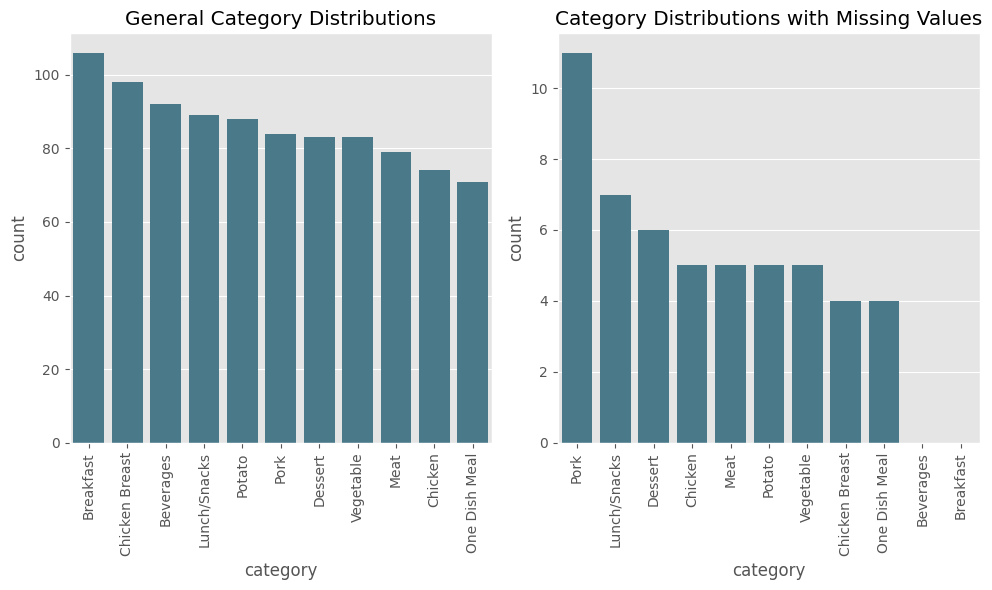

In [15]:
category_counts = df["category"].value_counts()
missing_value_category_counts = df.loc[df.select_dtypes(include="float64").isnull().all(axis=1),"category"].value_counts()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
axs[0]=sns.barplot(x=category_counts.index, y=category_counts,order=category_counts.index,ax=axs[0])
axs[0].set_title("General Category Distributions")
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)

axs[1]=sns.barplot(x=missing_value_category_counts.index,y=missing_value_category_counts,order=missing_value_category_counts.index,ax=axs[1])
axs[1].set_title("Category Distributions with Missing Values")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

- Target variable-based analysis of missing data

General high_traffic distribution:
- There are 574 High traffic values and 373 Normal traffic values in the general of the data.

In [16]:
df["high_traffic"].value_counts()

high_traffic
High      574
Normal    373
Name: count, dtype: int64

Missing values at high traffic distribution:
 - It was determined that 39 of the 52 missing data that occurred simultaneously in the calories, carbohydrate, sugar and protein variables were in the High category and 13 of them were in the normal category.

In [17]:
df.loc[df.select_dtypes(include="float64").isnull().all(axis=1),"high_traffic"].value_counts()

high_traffic
High      39
Normal    13
Name: count, dtype: int64

Conclusion about missing values:

- Missing data were examined categorically and on a target variable basis. According to this
1. Missing data occurred simultaneously in the variables calories, carbohydrate, sugar and protein and is in 52 lines.
2. Missing data occurred in the categories Pork,Potato, One Dish Meal, Chicken Breast, Lunch/Snacks, Chicken, Vegetable, Meat and Dessert. There is no missing data in the Breakfast and Beverages categories.
3. In the high_traffic variable, 39 of the missing data are in the High category and 13 of them are in the Normal category.

The reason why missing data are in certain categories and numerical variables are present at the same time may be due to a systematic error in the data collection phase in the relevant categories.

Since the missing data was in the calories, carbohydrate, sugar and protein variables at the same time, and because it was approximately 5% of the entire data set, and finally, deleting it would not affect the class balance in the target variable high_traffic, I cleaned these data by removing them from the data set. 

In [18]:
# Missing data threshold approximately %5 of whole data
threshold = len(df) * 0.055
threshold

52.085

In [19]:
cols_to_drop = df.columns[df.isnull().sum() <= threshold]
df.dropna(subset=cols_to_drop, axis = 0, inplace = True)

In [20]:
df.reset_index(drop=True,inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        895 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      895 non-null    category
 6   servings      895 non-null    int32   
 7   high_traffic  895 non-null    category
dtypes: category(2), float64(4), int32(1), int64(1)
memory usage: 40.8 KB


In [22]:
# Validate no missing values after cleaning the data
df.isnull().sum()

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

In [23]:
df.shape

(895, 8)

Duplicate check

In [24]:
# validate there is any dupplicated data
df[df.duplicated(keep=False)]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic


In [25]:
# validate there is any dupplicated data at numeric data
df[df.duplicated(subset=["calories","carbohydrate","sugar","protein"],keep=False)]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic


In [26]:
# validate there is any dupplicated data at unique recipe variable
df[df.duplicated(subset=["recipe"],keep=False)]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic


- Final cleaned data

In [27]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,2,35.48,38.56,0.66,0.92,Potato,4,High
1,3,914.28,42.68,3.09,2.88,Breakfast,1,Normal
2,4,97.03,30.56,38.63,0.02,Beverages,4,High
3,5,27.05,1.85,0.80,0.53,Beverages,4,Normal
4,6,691.15,3.46,1.65,53.93,One Dish Meal,2,High


In [28]:
# Validate any negative values in numeric variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
recipe,895.0,473.652514,272.763283,2.00,237.500,475.00,708.500,947.00
calories,895.0,435.939196,453.020997,0.14,110.430,288.55,597.650,3633.16
carbohydrate,895.0,35.069676,43.949032,0.03,8.375,21.48,44.965,530.42
sugar,895.0,9.046547,14.679176,0.01,1.690,4.55,9.800,148.75
protein,895.0,24.149296,36.369739,0.00,3.195,10.80,30.200,363.36
servings,895.0,3.458101,1.735979,1.00,2.000,4.00,4.000,6.00


**Explatory Analysis**

- Defining the functions used in explatory analysis

In [29]:
# Plot Function 
def single_variable_multiple_plot(data,type="float64",numeric=True):
    """
    Visualizes a single variable in the dataset using histogram, box plot, and kernel density estimate (for numeric variables) 
    or count plot and pie chart (for categorical variables).

    Parameters:
    data : DataFrame
        The dataset.
    type : str, optional
        Data type of numerical variables. Default is 'float64'.
    color : str, optional
        Color palette for the plots. Default is 'lightslategrey'.
    numeric : bool, optional
        If True, plots will be created for numerical variables; if False, plots will be created for categorical variables. Default is True.

    Returns:
    None
    """
    if numeric: 
         numeric_columns= [col for col in data.columns if data[col].dtype == type]
         for i in numeric_columns:
            fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(20,4))
            sns.histplot(x=data[i],bins=10,ax=axes[0])
            axes[0].set_title(i)
            sns.boxplot(x=data[i],ax=axes[1])
            axes[1].set_title(i)
            sns.kdeplot(x=data[i],ax=axes[2])
            axes[2].set_title(i)
            plt.show()
    
    else:
         categoric_columns= [col for col in data.columns if data[col].dtype in ["object","category","int32"]]
         for i in categoric_columns:
            fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
            sns.countplot(data=data, x=i,order=data[i].value_counts().index, ax=axes[0])
            axes[0].set_title(i)
            axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
            plt.pie(data[i].value_counts(), autopct='%1.1f%%',labels=data[i].value_counts().index)
            axes[1].set_title(i)
            axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
            plt.tight_layout()
            plt.show()

In [30]:
# Outlier function

def outlier_thresholds(dataframe, variable, q1_thr=0.25, q3_thr=0.75):
    """
    Calculate the lower and upper bounds to cap outliers in a variable.

    Parameters
    ----------
    dataframe : pandas.DataFrame
        The DataFrame containing the variable.
    variable : str
        The name of the variable for which to calculate the outlier thresholds.
    q1_thr : float, optional
        The quantile value for the lower quartile. Default is 0.25.
    q3_thr : float, optional
        The quantile value for the upper quartile. Default is 0.75.

    Returns
    -------
    low_limit : float
        The lower bound threshold for capping outliers.
    up_limit : float
        The upper bound threshold for capping outliers.
    """
    quartile1 = dataframe[variable].quantile(q1_thr)
    quartile3 = dataframe[variable].quantile(q3_thr)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

**Analysis of continuous numerical variables**

- Investigation of calories, carbohydrate, sugar and protein variables distribution
  
When I looked at the summary statistics, I saw that the median values in these 4 variables were lower than the average. This gave me the impression that these variables were all skewed to the right. When I look at the minimum and maximum values, I see that these values are far from the average and median. Also, standard deviations are very high. This may be due to outliers in the data set.

To deal with this situation, I visualized these numerical variables one by one and looked at their distribution. Then I did an outlier analysis.

To visualize the distribution, I chose histogram, kdeplot and boxplot. Since the histogram is affected by binning bias, I will look at it together with the kernel density estimation chart, which reveals the distribution more clearly. I added the boxplot to visualize outliers.

After the visualizations, it was more clearly determined that the distributions were skewed to the right and there were outliers.



In [31]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,2,35.48,38.56,0.66,0.92,Potato,4,High
1,3,914.28,42.68,3.09,2.88,Breakfast,1,Normal
2,4,97.03,30.56,38.63,0.02,Beverages,4,High
3,5,27.05,1.85,0.80,0.53,Beverages,4,Normal
4,6,691.15,3.46,1.65,53.93,One Dish Meal,2,High


In [32]:
df.describe(include="float64").T

,count,mean,std,min,25%,50%,75%,max
calories,895.0,435.939196,453.020997,0.14,110.430,288.55,597.650,3633.16
carbohydrate,895.0,35.069676,43.949032,0.03,8.375,21.48,44.965,530.42
sugar,895.0,9.046547,14.679176,0.01,1.690,4.55,9.800,148.75
protein,895.0,24.149296,36.369739,0.00,3.195,10.80,30.200,363.36


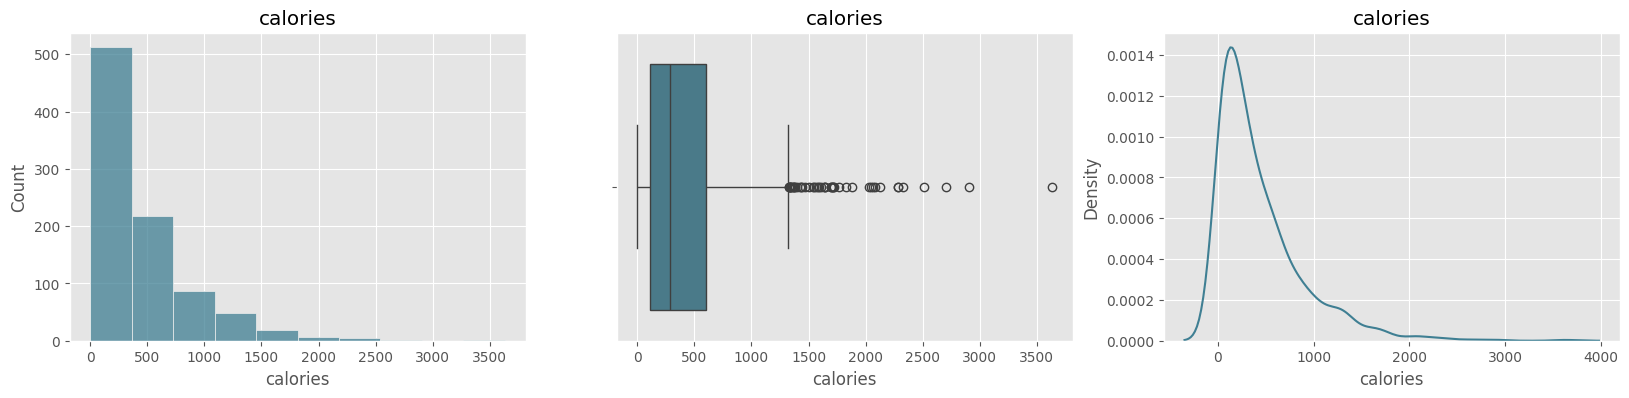

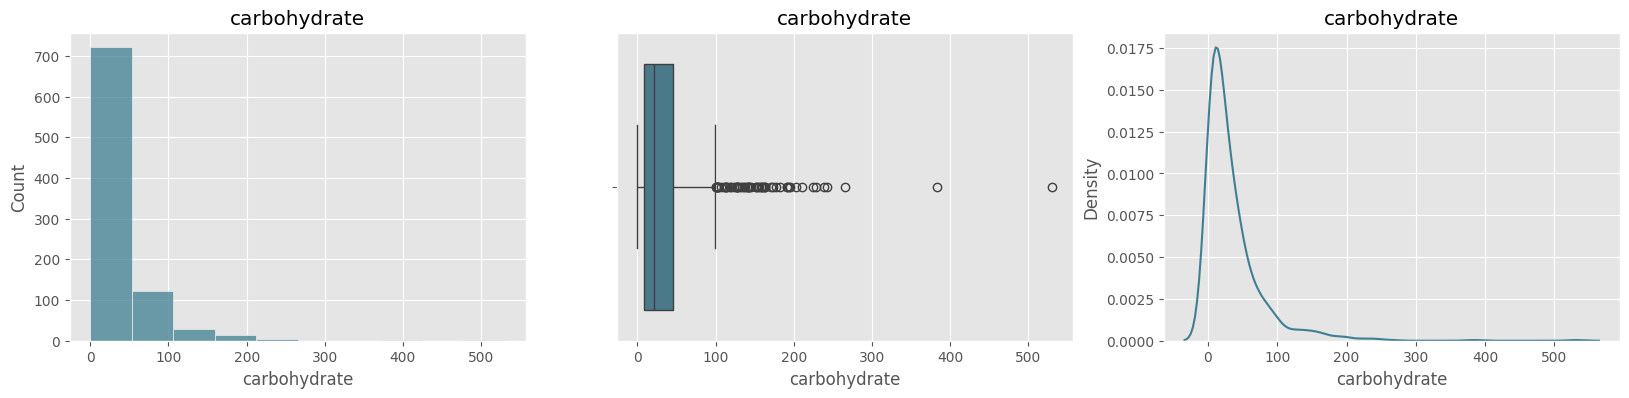

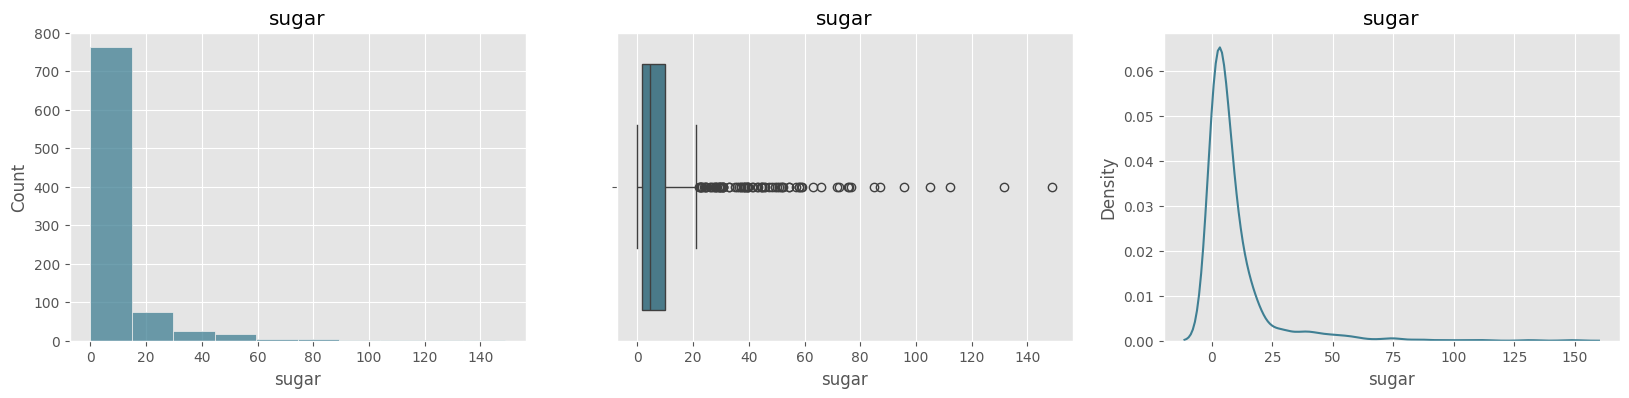

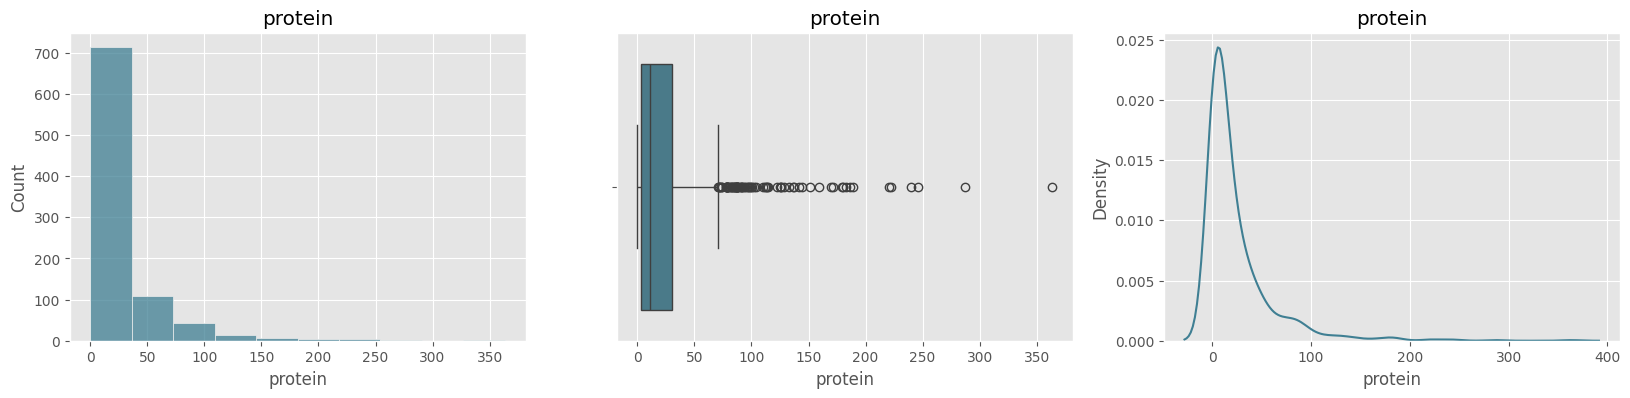

In [33]:
single_variable_multiple_plot(df,"float64")

- Outlier analysis of carbonhydrate, sugar, protein and calories variables
  
I preferred the iqr method because the distribution does not need to be transformed and is sensitive to outliers.
  

- carbonhydrate variable outlier analysis:

When applying iqr for this variable, I chose a lower and upper limit based on quarterly values of 25% for q1 and %75 for q3. Since my low_limit was negative, I did not change at the lower values and 
capped the upper limit to the up_limit value.
As a result i capped 58 of outlier values to the up_limit (99.85) value to avoid data loss



In [34]:
low_limit, up_limit = outlier_thresholds(df,"carbohydrate")
df[(df["carbohydrate"] < low_limit) | (df["carbohydrate"] > up_limit)].shape

(58, 8)

In [35]:
df.loc[(df["carbohydrate"] > up_limit), "carbohydrate"] = up_limit

- sugar variable outlier analysis:

When applying iqr for this variable, I chose a lower and upper limit based on quarterly values of 25% for q1 and %75 for q3. Since my low_limit was negative, I did not change at the lower values and capped the upper limit to the up_limit value.
As a result i capped 79 of outlier values to the up_limit (21.96) value to avoid data loss

In [36]:
low_limit, up_limit = outlier_thresholds(df,"sugar")
df[(df["sugar"] < low_limit) | (df["sugar"] > up_limit)].shape

(79, 8)

In [37]:

df.loc[(df["sugar"] > up_limit), "sugar"] = up_limit

- protein variable outlier analysis:

When applying iqr for this variable, I chose a lower and upper limit based on quarterly values of 25% for q1 and %75 for q3. Since my low_limit was negative, I did not change at the lower values and capped the upper limit to the up_limit value. As a result i capped 77 of outlier values to the up_limit (70.70) value to avoid data loss

In [38]:
low_limit, up_limit = outlier_thresholds(df,"protein")
df[(df["protein"] < low_limit) | (df["protein"] > up_limit)].shape

(77, 8)

In [39]:
df.loc[(df["protein"] > up_limit), "protein"] = up_limit

- calories variable outlier analysis:

The same method was used in the analysis of this variable. Lower and upper limits have been determined. Since the lower limit was negative, it was not taken into account. The upper limit is determined as 1328.48 according to the 75% quarter. The 47 outlier high values were replaced accordingly.

For determining the lower limit, I saw inconsistently low calorie values.

As a result of my research for this purpose, I saw that the 4-9-4 system, developed by chemist Wilbur Atwater in the United States in the 19th century, was generally used to calculate caloric value. According to this system, proteins and carbohydrates each have about 4 calories per gram and fats have 9 calories per gram.

If we apply the formula to our dataset, the formula will be as follows, since sugar is also included in the carbohydrate class:
calorie = protein x 4 + carbonhydrate x 4 + sugar x 4 + fat x 9

The fat variable is not given in our data set. But we can create a fat variable using this formula.

To get a general idea, I grouped the data set according to category and servings and obtained the median values of calories, protein, sugar, carbohydrate variables and calculated calories without the fat variable.

The result I got shows that if we had a fat variable, we could obtain approximately the caloric value.

In line with this information, I created the variable calories_with_fat_is_1 by using the calorie formula and accepting the fat variable as constant 1. When I queried the calorie variables smaller than this variable, I detected calorie values in 357 rows that were smaller than the value calculated from the formula. Caloric values should be equal to or more than the value calculated from the formula.

It may be a solution to cap the 357 detected rows to the value calculated from the formula, but since the proportion of detected data is higher according to whole data set, we need to discuss this issue with the product team. For now,  I capped these values that are less than 20 calories to the value that calculated from the formula. 41 value changed.

I tried creating a fat variable but for this reason I got more than 300 negative values. Therefore, I gave up adding the fat variable.

In [40]:
low_limit, up_limit = outlier_thresholds(df,"calories")
df[(df["calories"] < low_limit) | (df["calories"] > up_limit)].shape

(47, 8)

In [41]:
# outliers capped to the upper limit
df.loc[(df["calories"] > up_limit), "calories"] = up_limit

In [42]:
# inconsistent low calorie values
df[(df["calories"] < 20)].head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
19,21,9.26,17.44,8.16,10.81,Potato,6,High
55,59,6.23,56.43,5.60,2.12,Lunch/Snacks,6,High
76,80,19.91,35.47,2.17,11.82,Breakfast,1,High
131,140,13.62,92.02,0.89,44.92,One Dish Meal,1,High
132,141,4.22,3.46,10.93,0.74,Beverages,6,Normal


In [43]:
# calories without fat
# it validates that if we had fat variable we could approximately calculate the calorie variable
grouped_df = df.groupby(["category","servings"])[["calories","protein","sugar","carbohydrate"]].median().reset_index().head()
grouped_df["calories_without_fat"] = (grouped_df["protein"] * 4) + (grouped_df["sugar"] * 4) + (grouped_df["carbohydrate"] * 4)
grouped_df.head()

,category,servings,calories,protein,sugar,carbohydrate,calories_without_fat
0,Beverages,1,154.465,0.400,9.385,11.120,83.62
1,Beverages,2,199.340,0.560,7.580,13.870,88.04
2,Beverages,4,129.450,0.405,9.885,12.415,90.82
3,Beverages,6,88.170,0.400,6.470,8.840,62.84
4,Breakfast,1,253.465,13.975,3.590,28.850,185.66


In [44]:
# new calories_with_fat_is_1 varible is created for cap the inconsistent variables below the 20 calorie. fat value assumed 1 for every variable.
df["calories_with_fat_is_1"] = (df["protein"] * 4) + (df["sugar"] * 4) + (df["carbohydrate"] * 4) + 9
# calorie values filtered as lower than calories_with_fat_is_1 and lower than 20 calorie value
filtered_df = df[(df["calories"] < df["calories_with_fat_is_1"]) & (df["calories"] <= 20)]
# new calculated values overwrited on calories that below the 20
df.loc[filtered_df.index, "calories"] = filtered_df["calories_with_fat_is_1"]
# finally i dropped the calculated column
df.drop("calories_with_fat_is_1",axis=1,inplace=True)

In [45]:
# Validation of outlier analysis performed on calories, carbonhydrate, sugar and protein variables.
df.describe(include="float64").T

,count,mean,std,min,25%,50%,75%,max
calories,895.0,423.717184,370.963353,20.81,130.290,299.14,597.650,1328.4800
carbohydrate,895.0,31.083430,28.945415,0.03,8.375,21.48,44.965,99.8500
sugar,895.0,6.834866,6.624471,0.01,1.690,4.55,9.800,21.9650
protein,895.0,20.124053,22.111812,0.00,3.195,10.80,30.200,70.7075


**Analysis of categorical variables**

Investigation of category, servings and high trafic variables distribution: 
I chose countplot to see categorical variables numerically and pie plot to see them as percentages.

- category variable:
Although the categories of breakfast, chicken breast, and beverages stand out slightly in percentage terms, it seems that the category distribution is generally balanced.

- servings variable:
Servings category 4-person recipes stand out with a 41% significant difference. This may indicate that the recipes are preferred more by small families.

- high_traffic variable:
The fact that approximately 60% of the samples are High and 40% are Normal shows that we are faced with a class imbalance problem. This situation is discussed in detail in the model section.


In [46]:
df["high_traffic"].value_counts()

high_traffic
High      535
Normal    360
Name: count, dtype: int64

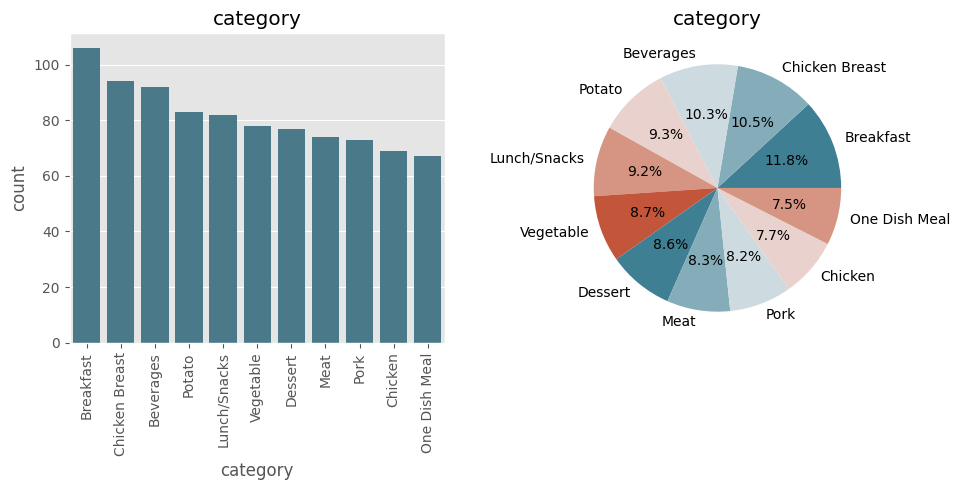

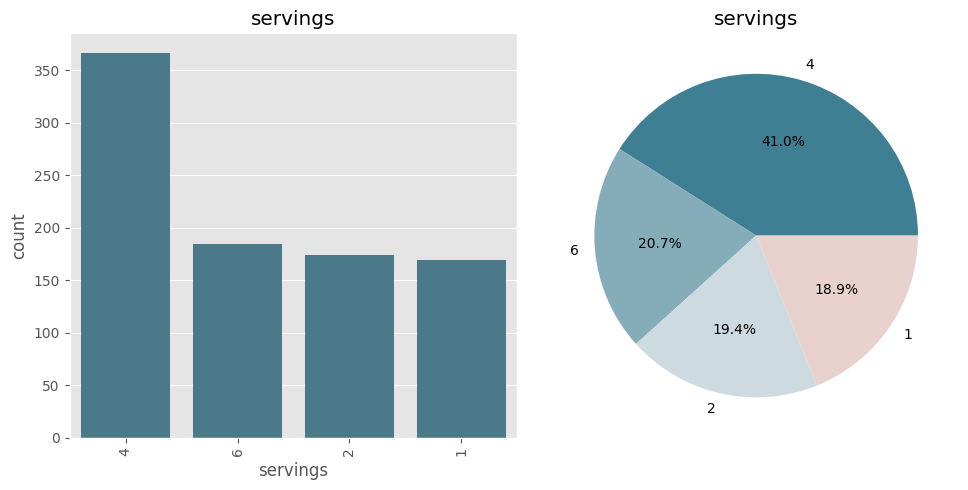

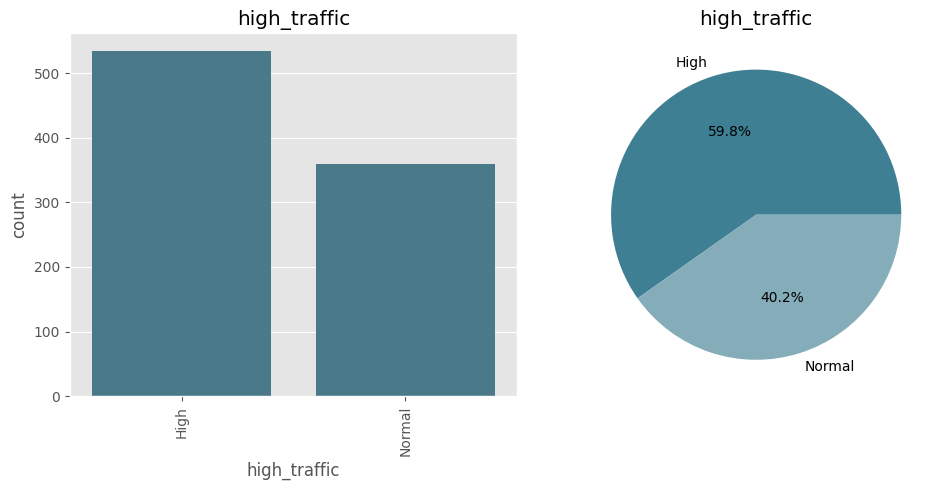

In [47]:
single_variable_multiple_plot(df,numeric=False)

**General visualizations and insights**

- According to the graph of website traffic by categories, the category with the highest traffic is vegetables. Almost all vegetable related recipes generated high traffic. This is followed by potato, pork, one dish meal, meat, lunch and snacks and finally dessert. On the other hand, the least demanded category is the beverages category. And this is followed by chicken, breakfast and chicken breast, respectively. If we had to make a ranking, the order would be vegetable, potato, pork, one dish meal, meat, lunch/snacks, dessert, chicken breast, breakfast, chicken, and beverages.
- According to the graph of website traffic by servings. Differences in high and normal bars are due to class imbalance. In this chart, the most preferred servings are those for 4 people. This may indicate that the recipes are preferred more by small families.

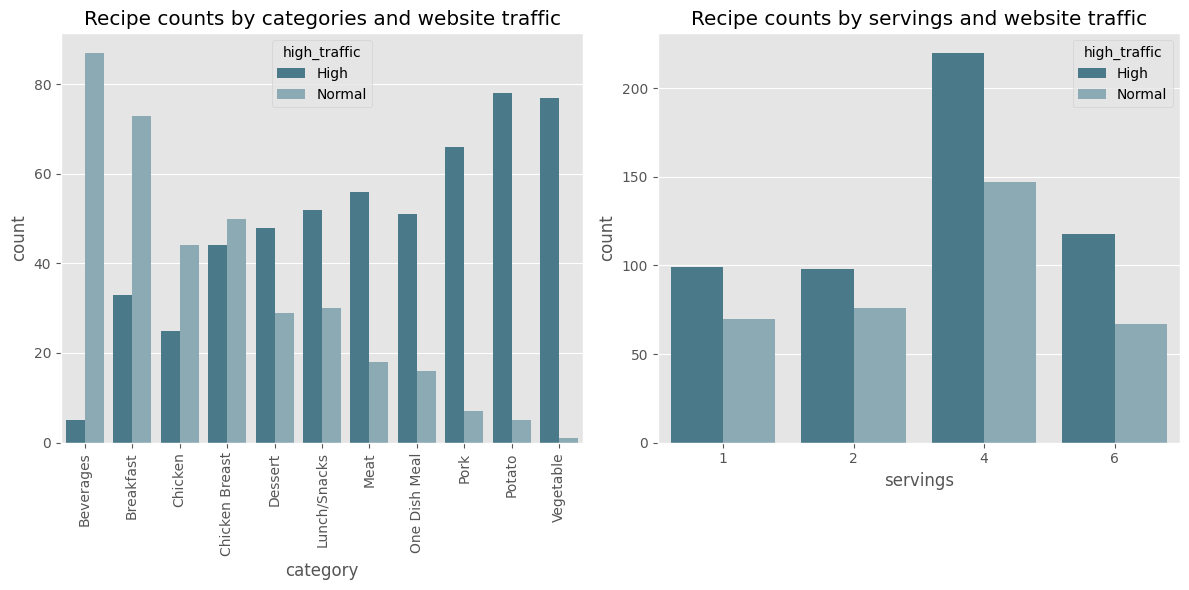

In [48]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axs[0]=sns.countplot(data=df, x="category", hue="high_traffic",ax=axs[0])
axs[0].set_title("Recipe counts by categories and website traffic")
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)

axs[1]=sns.countplot(data=df, x="servings", hue="high_traffic",ax=axs[1])
axs[1].set_title("Recipe counts by servings and website traffic")
axs[1].set_xticklabels(axs[1].get_xticklabels())
plt.tight_layout()
plt.show()

- If we look at the high traffic values in terms of calories, carbohydrates, sugar and protein, we see that recipes containing high protein, high carbohydrate, high calories and low sugar are preferred. People seem to prefer more low sugar high protein.

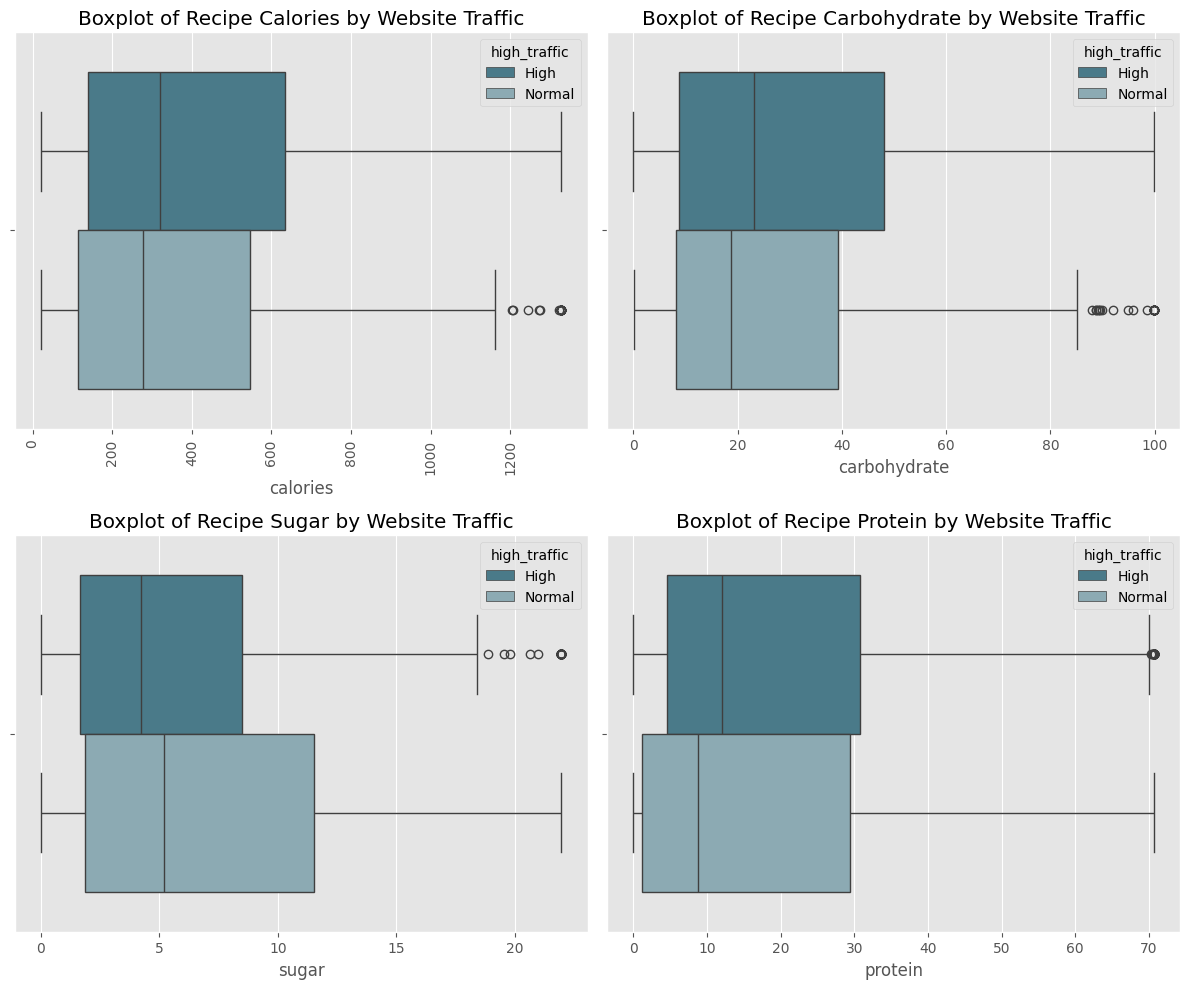

In [49]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
ax1=sns.boxplot(data=df, x="calories", hue="high_traffic",ax=ax1)
ax1.set_title("Boxplot of Recipe Calories by Website Traffic")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

ax2=sns.boxplot(data=df, x="carbohydrate", hue="high_traffic",ax=ax2)
ax2.set_title("Boxplot of Recipe Carbohydrate by Website Traffic")
ax2.set_xticklabels(ax2.get_xticklabels())

ax3=sns.boxplot(data=df, x="sugar", hue="high_traffic",ax=ax3)
ax3.set_title("Boxplot of Recipe Sugar by Website Traffic")
ax3.set_xticklabels(ax3.get_xticklabels())

ax4=sns.boxplot(data=df, x="protein", hue="high_traffic",ax=ax4)
ax4.set_title("Boxplot of Recipe Protein by Website Traffic")
ax4.set_xticklabels(ax4.get_xticklabels())


plt.tight_layout()
plt.show()

- I found it interesting that high-calorie recipes caused high traffic. For this reason, I redrawn the boxplot of calorie values according to categories. According to my results, low calories were preferred in all categories except Chicken breast, Dessert, Lunch/snacks and vegetables categories. Since all vegetables are preferred anyway, it is normal for them to cause high traffic. It is a known fact that desserts are high in calories. There are 2 notable categories in this graph. In the chicken breast category, especially high-calorie ones were preferred. Low-calorie recipes are mostly preferred in the potato category.
- -In general, there is a greater tendency towards healthy eating.

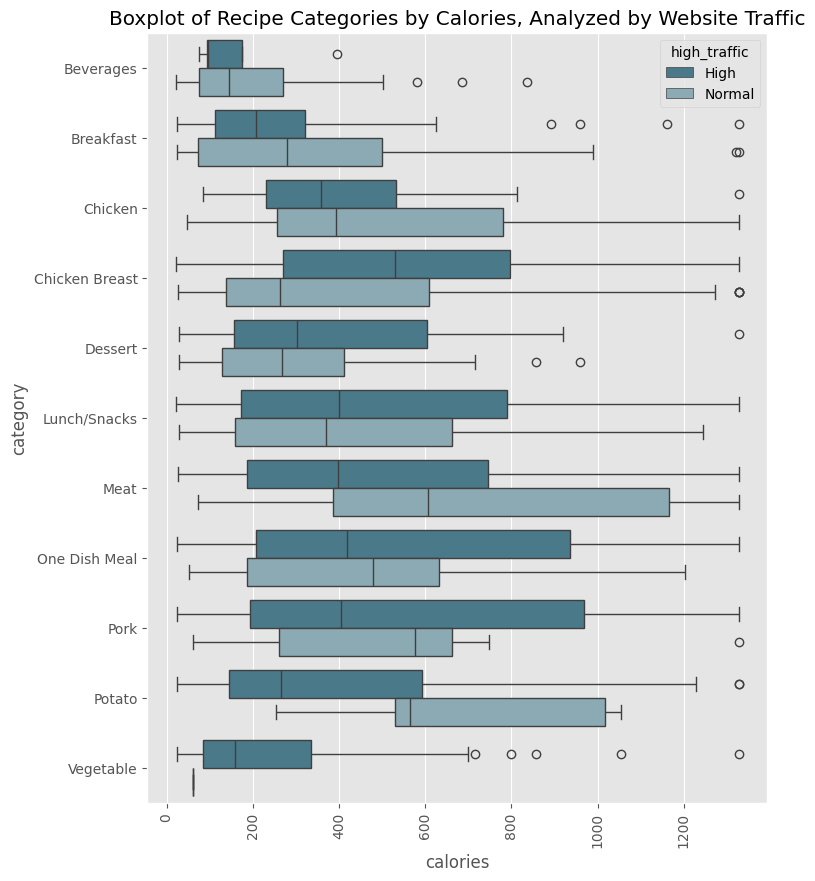

In [50]:
plt.figure(figsize=(8, 10)) 
sns.boxplot(data=df, x="calories",y="category",hue="high_traffic")
plt.title("Boxplot of Recipe Categories by Calories, Analyzed by Website Traffic")
plt.xticks(rotation=90)
plt.show()

The most important note to remember for these inferences is that there is a class imbalance of 60% High and 40% Normal in our high _traffic variable in our data set. This may cause misleading results. Therefore, more accurate inferences can be made if balanced data is provided.

**Model Fitting & Evaluation**
- Predicting the popular recipes is a binary classification problem in machine learning. I chose the Logistic Regression model as a first model because If there is no linear separation in the dataset or no significant linear relationship between variables we can still use it and also due to its simplicity and widespread usage at binary classification problems.
  
- The comparison model i chose is Random Forests Classifier because tree-based models can naturally address the class imbalance issue and perform well on unbalanced datasets. Additionally, instead of using a single tree model, I used the Random Forest Classifier, which I thought would give better results since it is a frequently used model that produces results according to the common decision of many independent trees based on the principle of wisdom of the crowd principle. Another reason why I chose both models is that they handle class imbalances with the class_weights parameter and give importance to low density classes.
  
- For the evaluation stage, firstly i chose precision score because the email includes the statement "They want us to predict which recipes will be popular 80% of the time and minimize the chance of showing unpopular recipes" it emphasizes the need to minimize false positives (misclassifying unpopular recipes as popular). In this case, the precision metric focuses on reducing the number of false positives by measuring the proportion of recipes predicted as popular that are truly popular. We can calculate precision score from the the confusion matrix with the formula of true positive / true positive + false positive.
  
- Secondly i chose roc auc score. The roc auc score evaluates the model's ability to accurately distinguish all classes (both positive and negative). This focuses on balancing false positives and false negatives (sensitivity and specificity).

- Defining Model Evaluation Function

I have modularized the entire process of model training and evaluation into a function to make things easy and error-free. This function takes the model, the splited data, cross validation function, the score function as a parameter and returns the trained model, the dataframe containing the training and validation scores, the final test score and predictions on test set. If the plot parameter is also specified as True, it plots the training and validation results.  Applying cross validation on training data is a frequently preferred method during the model evaluation phase. In this way, we can more easily observe overfitting and underfitting situations by comparing the results of the model on the training, validation and test set and we can tune the hyperparameters according the this results. Also if the problem is classification function prints the confusion matrix as well. Confusion matrix in sklearn shows us the counts of true negative, false positive predictions as first row and  false negative and true positive predictions as a second row of the model.

In [52]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test,score_func, cv_type, plot=True):
 
    """
    This function uses cross-validation method to evaluate the performance of a model and detect issues like overfitting or underfitting.

    Parameters:
    model : the model to be trained.
    X_train : pandas.DataFrame, splitted training dataset.
    y_train : pandas.Series, target variable of the training dataset.
    X_test : pandas.DataFrame, splitted test dataset.
    y_test : pandas.Series, target variable of the test dataset.
    score_func : function, evaluation metric. For example, accuracy_score, precision_score, recall_score, etc.
    cv_type : cross-validation strategy. For example, KFold, StratifiedKFold, etc.
    plot : bool, optional (default=True)
        Whether to plot the training and validation scores. If True, plots will be displayed.

    Returns:
    model : trained model.
    final_test_score : float, Metric score obtained on the test set.
    scores_df : pandas.DataFrame, Dataframe containing calculated train and validation scores.
    y_pred_test: pandas.Series, predictions on test set. if the score metric is roc_auc_score it returns predicted probabilities.
    """

    # defining the score lists
    train_scores = []
    validation_scores = []
    score_per_fold = []
    fold = 1

    # cross validation stage for detecting overfitting underfitting
    for train_index, test_index in cv_type.split(X_train,y_train):
        X_train_cv, X_validation_cv = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_cv, y_validation_cv = y_train.iloc[train_index], y_train.iloc[test_index]

        # model fit on cross validation training set
        model.fit(X_train_cv, y_train_cv)
        y_pred_train = model.predict(X_train_cv)
        y_pred_validation = model.predict(X_validation_cv)
        
        # calculate train score
        train_score = score_func(y_train_cv, y_pred_train)
        # calculate validation score
        validation_score = score_func(y_validation_cv, y_pred_validation)

        # add scores to the train and validation lists
        train_scores.append(train_score)
        validation_scores.append(validation_score)

        # print the scores per fold
        # print(f'Fold {fold} train_{score_func.__name__}: {train_score:.2f}')
        # print(f'Fold {fold} validation_{score_func.__name__}: {validation_score:.2f}')

        fold += 1
        # fold list for plotting stage
        score_per_fold.append(fold)

    print("Cross validation stage has been completed! Model is started to training...")

    # After cross validation stage complated. Model trained on whole training set
    model.fit(X_train, y_train)
    print("*******************************************")
    print("Model training stage has been completed!")
    print("*******************************************")

    # predict on test set and it checks if the score function name is roc_auc_score we want to predicted probabilities that belongs to 1
    if score_func.__name__ == "roc_auc_score":
        y_pred_test = model.predict_proba(X_test)[:,1]
    else:
        y_pred_test = model.predict(X_test)
    
    # score on test set
    final_test_score = score_func(y_test, y_pred_test)

    # dictionary saves the scores
    scores_dict = {
    "fold": range(1, len(score_per_fold) + 1),
    f"train_{score_func.__name__}": train_scores,
    f"validation_{score_func.__name__}": validation_scores
    }
    # dataframe for plotting
    scores_df = pd.DataFrame(scores_dict)

    print(f"Average train_{score_func.__name__} result: {np.mean(train_scores):.2f}")
    print(f'Average validation_{score_func.__name__} result: {np.mean(validation_scores):.2f}')
    print(f'Final test_{score_func.__name__} result: {final_test_score:.2f}')
    
    # it prints confusion matrix if the problem is classification
    if score_func.__name__ in ["precision_score","recall_score","f1_score"]:
        cf_matrix = confusion_matrix(y_test, y_pred_test)
        print(f"Confusion Matrix on Final Test Set:\n {cf_matrix}")

    print("*******************************************")

    if plot:
        sns.lineplot(data=scores_df, x="fold", y=f"train_{score_func.__name__}", marker="o", label=f"train_{score_func.__name__}")
        sns.lineplot(data=scores_df, x="fold", y=f"validation_{score_func.__name__}", marker="v", label=f"validation_{score_func.__name__}")
        plt.xlabel("Fold")
        plt.ylabel(f"{score_func.__name__}")
        plt.title(f"{score_func.__name__} of each fold")
        plt.legend()
        plt.show()

    return  model, final_test_score, scores_df, y_pred_test

- Defining Roc Curve Function
  
The ROC curve is a graphical representation of the performance of a binary classification model at different threshold values. It plots the true positive rate (TPR) against the false positive rate (FPR). TPR measures how accurately the model identifies true positive cases, while FPR measures how falsely the model classifies negative cases as positive. The ROC curve visualizes the trade-off between TPR and FPR as the classifier's decision threshold changes. The Area Under the Curve (AUC) represents the area beneath the curve and is used to measure the overall performance of the model. So, the ROC curve and AUC are important tools for evaluating and comparing the performance of binary classification models.
  

In [99]:

def plot_roc_curve(y_true, y_pred_prob):
    """
    Plots the Receiver Operating Characteristic (ROC) curve using the true and predicted probabilities of classes.

    Parameters:
    y_true : array-like, shape (n_samples,)
        True class labels.
    y_pred_prob : array-like, shape (n_samples,)
        Predicted probabilities of the positive class.

    Returns:
    None
    """
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

    # Compute Area Under Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color="teal", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
    plt.plot([0, 1], [0, 1], color="lightsteelblue", lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()


**Prepare Data for Modelling**

Encoding target variable
- high_traffic variable is our target variable that we want to predict. So i binary encoded High value as 1, Normal value as 0.

In [54]:
df["high_traffic"].value_counts()

high_traffic
High      535
Normal    360
Name: count, dtype: int64

In [55]:
df["high_traffic"] = np.where(df["high_traffic"]=="High",1,0)
df["high_traffic"].value_counts()

high_traffic
1    535
0    360
Name: count, dtype: int64

**Corelation Analysis**
- Finally, correlation analysis was performed to see whether there was a linear correlation between the binary coded target variable and other variables. According to this analysis, there is a weak positive relationship between calories and protein, and a weak negative relationship between sugar and protein. No other significant correlation was observed.

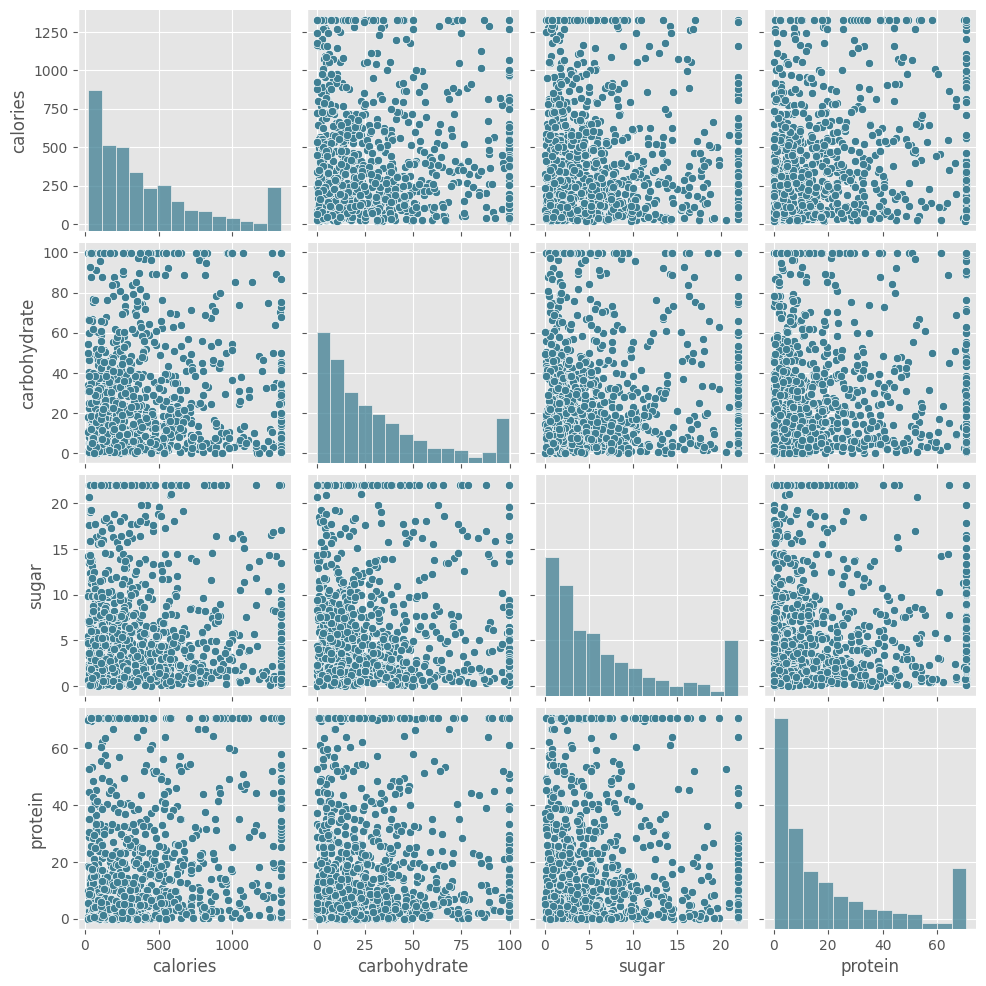

In [56]:
sns.pairplot(data=df.select_dtypes(include=["float64"]))
plt.show()

<Axes: >

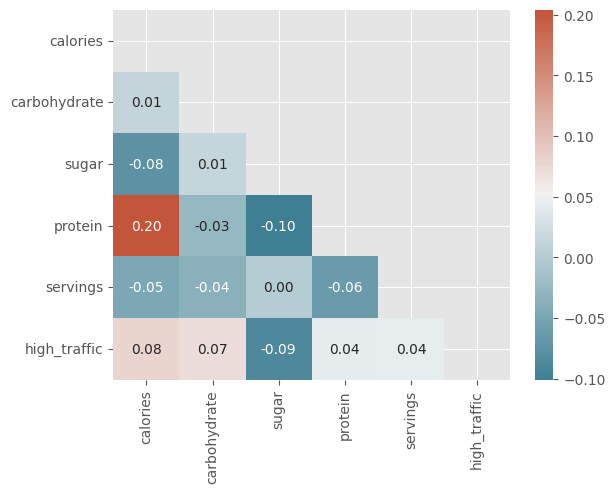

In [57]:
num_variables = df.select_dtypes(include=["float64","int32"])
corr_df = num_variables.corr()
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(tri_df,annot=True,fmt=".2f",cmap = cmap)

**Proper encoding of categorical variables**
- The categorical variable, referred to as "servings" in the dataset, has been previously converted to integers because its values imply an ordinal relationship. 
- The other categorical variable is named "category," comprising 11 different categories. Since there is no ordinal relationship among these categories, they have been encoded using the one-hot encoding method. When applying the "One-hot encoding" method, it's important to avoid the dummy trap. The dummy trap can occur when creating dummy variables during the one-hot encoding process for categorical variables, leading to a linear dependency among the dummy variables. For example, if one category is not represented in a variable, the value of this category variable is automatically known when the values of all other categories are known. This can potentially decrease the accuracy and performance of the model. To prevent the dummy trap, it's common to drop one dummy variable using the drop_first parameter. This can help the model produce more balanced and reliable results. After one hot encoding, the original category variable dropped.

In [58]:
category_one_hot = pd.get_dummies(df["category"],drop_first=True).astype(int)
df.drop("category", axis=1,inplace=True)
df=pd.concat([df,category_one_hot], axis=1)
df.head()

,recipe,calories,carbohydrate,sugar,protein,servings,high_traffic,Breakfast,Chicken,Chicken Breast,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable
0,2,35.48,38.56,0.660,0.92,4,1,0,0,0,0,0,0,0,0,1,0
1,3,914.28,42.68,3.090,2.88,1,0,1,0,0,0,0,0,0,0,0,0
2,4,97.03,30.56,21.965,0.02,4,1,0,0,0,0,0,0,0,0,0,0
3,5,27.05,1.85,0.800,0.53,4,0,0,0,0,0,0,0,0,0,0,0
4,6,691.15,3.46,1.650,53.93,2,1,0,0,0,0,0,0,1,0,0,0


**Split the data into a training set and a test set**

- Recipe feature hasn't been used in the model stage because it serves as the unique identifier for recipes. A 25% portion of the data was set aside as the test set, and to preserve the imbalance in class distribution, the stratify parameter was set equal to the y variable.

In [59]:
target = "high_traffic"
columns_that_will_not_used = ["recipe","high_traffic"]
feature_columns = [col for col in df.columns if col not in columns_that_will_not_used]
X = df[feature_columns]
y= df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [60]:
df["high_traffic"].value_counts(normalize=True)

high_traffic
1    0.597765
0    0.402235
Name: proportion, dtype: float64

In [61]:
# Validation of class imbalance preservation at train set
y_train.value_counts(normalize=True)

high_traffic
1    0.597615
0    0.402385
Name: proportion, dtype: float64

In [62]:
# Validation of class imbalance preservation at test set
y_test.value_counts(normalize=True)

high_traffic
1    0.598214
0    0.401786
Name: proportion, dtype: float64

**Logistic Regression Model**

Highly right-skewed data needs to be scaled for the model to perform better. For this, I used robustscaler in the pipeline. RobustScaler works by using median and percentile ranges to reduce the impact of outliers. Therefore, it performs better when applied to skewed data.

Since the number of data was not very large, I used the GridSearchCV method to get the most accurate result. As a result of this process, the regularization C value was determined as 0.3 and the penalty value was determined as l2 (ridge). Since there is a class imbalance in our target variable, I chose class_weight="balanced" to take the less effective class more into consideration.

C: Regularization strength parameter in logistic regression. Smaller values indicate stronger regularization, reducing the influence of individual data points on the model.
Penalty: The type of regularization penalty used in logistic regression. "l2" indicates Ridge regularization, which penalizes the squared magnitude of coefficients, encouraging smaller coefficient values.

StratifiedKFold was chosen for cross validation to deal with class imbalance.

**Finding the best parameters for Logistic Regression Model**

In [310]:
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
scoring = make_scorer(precision_score) 
lr_cv = LogisticRegression()

lr_pipeline_cv = Pipeline([
    ("scaler", RobustScaler()),
    ("classifier", lr_cv)
])

params_lr = {
    "classifier__penalty": ["l1", "l2","elasticnet"],
    "classifier__C": [0.0001, 0.001, 0.01, 0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10, 100, 200],
    "classifier__class_weight": ["balanced"] 
} 

grid_rf = GridSearchCV(estimator=lr_pipeline_cv,param_grid=params_lr,cv=skf,scoring=scoring,verbose=1,n_jobs=-1)

grid_rf.fit(X,y)
best_hyperparams_lr = grid_rf.best_params_
best_score_lr = grid_rf.best_score_
print("Best hyperparameters for Logistic Regression:", best_hyperparams_lr)
print("Best score for Logistic Regression:", best_score_lr)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


Best hyperparameters for Logistic Regression: {'classifier__C': 0.3, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2'}
Best score for Logistic Regression: 0.8324532080551427


Cross validation stage has been completed! Model is started to training...
*******************************************
Model training stage has been completed!
*******************************************
Average train_precision_score result: 0.85
Average validation_precision_score result: 0.84
Final test_precision_score result: 0.91
Confusion Matrix on Final Test Set:
 [[82  8]
 [52 82]]
*******************************************


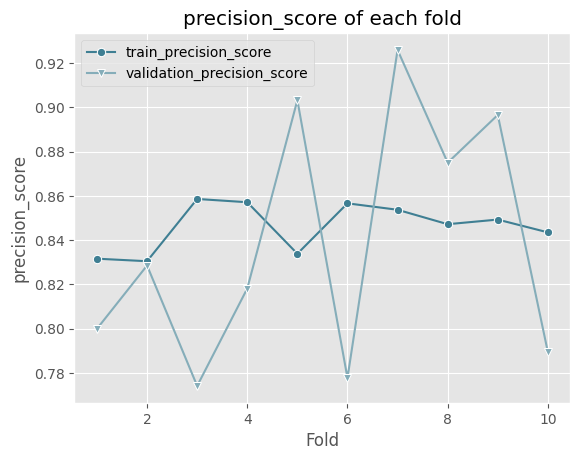

In [63]:
lr = LogisticRegression(C=0.3, class_weight="balanced", penalty="l2")

lr_pipeline = Pipeline([
    ("scaler", RobustScaler()),
    ("classifier", lr)
])
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
lr_model, lr_final_test_precision_score, lr_precision_scores_df,lr_y_pred_test = train_and_evaluate_model(lr_pipeline, X_train, y_train, X_test, y_test,precision_score, skf, plot=True)

Cross validation stage has been completed! Model is started to training...
*******************************************
Model training stage has been completed!
*******************************************
Average train_roc_auc_score result: 0.75
Average validation_roc_auc_score result: 0.74
Final test_roc_auc_score result: 0.79
*******************************************


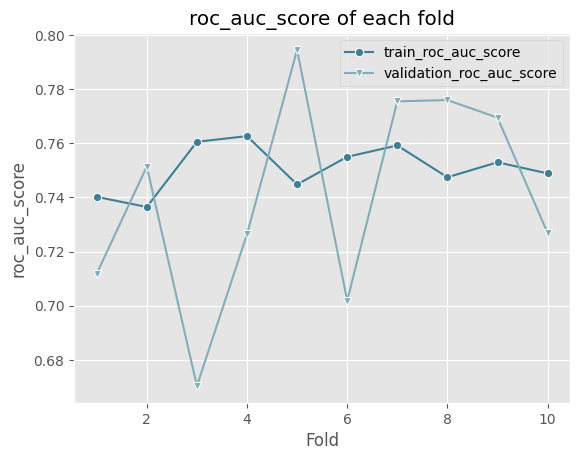

In [64]:
lr_model, lr_final_roc_auc_score, lr_roc_auc_scores_df,lr_y_pred_test = train_and_evaluate_model(lr_pipeline, X_train, y_train, X_test, y_test,roc_auc_score, skf, plot=True)

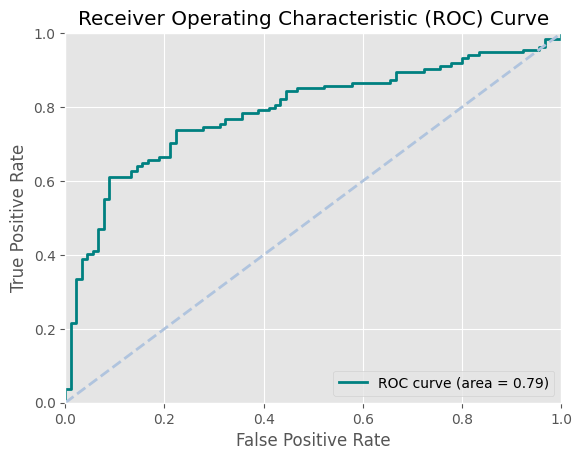

In [65]:
plot_roc_curve(y_test,lr_y_pred_test)

**Finding the Logistic Regression feature importances**

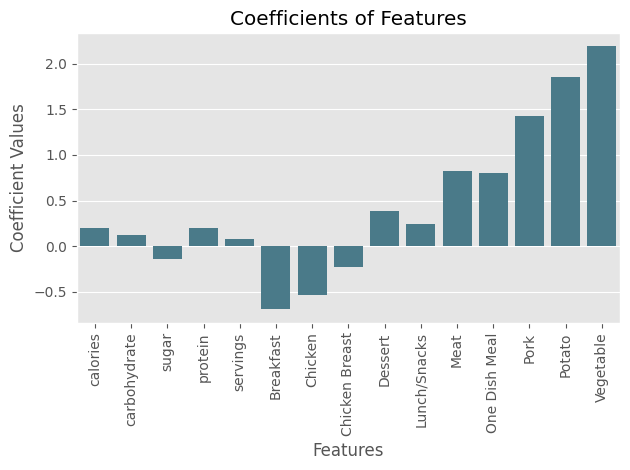

In [66]:
coef_values = lr_model.named_steps["classifier"].coef_[0]
columns = X_train.columns

sns.barplot(x=columns, y=coef_values)
plt.xlabel("Features")
plt.ylabel("Coefficient Values")
plt.title("Coefficients of Features")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Random Forest Classifier Model**
- Tree-based models can naturally deal with class imbalance and skewed features, so I did not apply any scaling at this stage. Again, I determined the appropriate tree hyperparameters with the GridSearchCV method. Gridsearch parameters determined as 'class_weight': 'balanced', 'max_depth': 2, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200

n_estimators: The number of decision trees in the forest. The more trees used, the more complex the model becomes and the longer the training time. This parameter can improve the overall performance of the model but may increase overfitting risk.

max_depth: The maximum depth of each decision tree. Deeper trees allow for more complex models but increase the risk of overfitting.

min_samples_split: The minimum number of samples required to split an internal node. Smaller values can lead to more trees and more complex models.

min_samples_leaf: The minimum number of samples required to be at a leaf node. Smaller values can lead to more complex models.

max_features: The maximum number of features to consider when splitting each decision tree. Higher values allow for more feature usage, increasing the model's complexity.

class_weight: The weighting method used to address imbalances between classes. The "balanced" option uses weights inversely proportional to class frequencies, so rare classes have more weight. This can provide better performance on imbalanced datasets


**Finding the best parameters for Random Forest Classifier Model**

In [109]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scoring = make_scorer(precision_score)
rf_cv = RandomForestClassifier(n_jobs=-1, random_state=42)

params_rf = {
    "n_estimators": [ 100, 150, 200, 250, 300],
    "max_depth": [None, 2, 4, 6, 8, 12],
    "min_samples_split": [1, 2, 5, 10],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": [0.3, 0.5, 0.7, 1],
    "class_weight": ["balanced"]
}
grid_rf = GridSearchCV(estimator=rf_cv, param_grid=params_rf, cv=skf, scoring=scoring, verbose=1, n_jobs=-1)

grid_rf.fit(X, y)
best_hyperparams_rf = grid_rf.best_params_
best_score_rf = grid_rf.best_score_

print("Best hyperparameters for Random Forest:", best_hyperparams_rf)
print("Best score for Random Forest:", best_score_rf)

Fitting 10 folds for each of 1920 candidates, totalling 19200 fits
Best hyperparameters for Random Forest: {'class_weight': 'balanced', 'max_depth': 2, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score for Random Forest: 0.8835179156453519


Cross validation stage has been completed! Model is started to training...
*******************************************
Model training stage has been completed!
*******************************************
Average train_precision_score result: 0.88
Average validation_precision_score result: 0.84
Final test_precision_score result: 0.93
Confusion Matrix on Final Test Set:
 [[86  4]
 [81 53]]
*******************************************


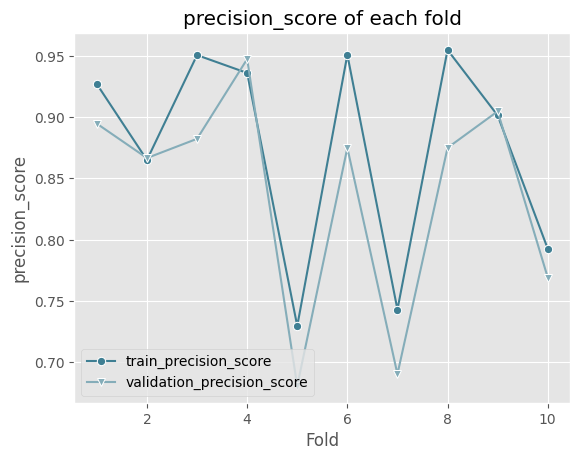

In [115]:
best_hyperparams_rf = {'class_weight': 'balanced', 'max_depth': 2, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
rf_clf = RandomForestClassifier(**best_hyperparams_rf,random_state=42)
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

rf_model, rf_final_test_precision_score, rf_precision_scores_df, rf_y_pred_test = train_and_evaluate_model(rf_clf, X_train, y_train, X_test, y_test,precision_score, skf, plot=True)

Cross validation stage has been completed! Model is started to training...
*******************************************
Model training stage has been completed!
*******************************************
Average train_roc_auc_score result: 0.71
Average validation_roc_auc_score result: 0.68
Final test_roc_auc_score result: 0.80
*******************************************


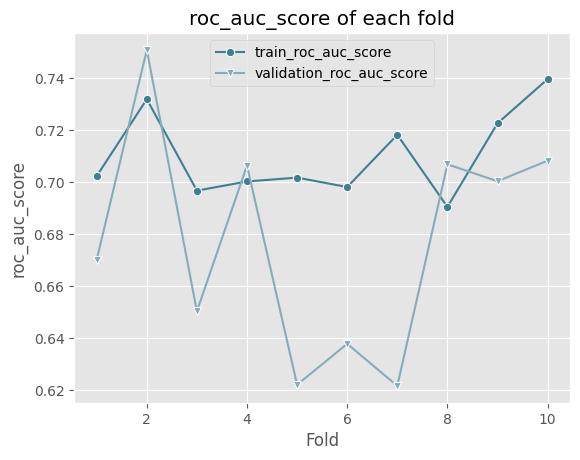

In [112]:
rf_model, rf_final_test_roc_auc_score, rf_roc_auc_scores_df, rf_y_pred_test = train_and_evaluate_model(rf_clf, X_train, y_train, X_test, y_test,roc_auc_score, skf, plot=True)


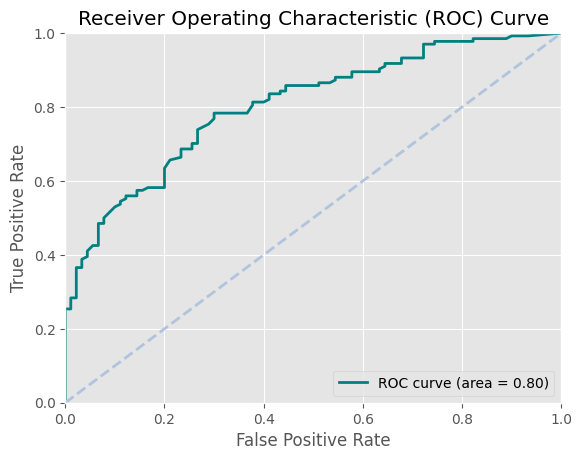

In [113]:
plot_roc_curve(y_test,rf_y_pred_test)

**Finding the Random Forest Classifier feature importances**

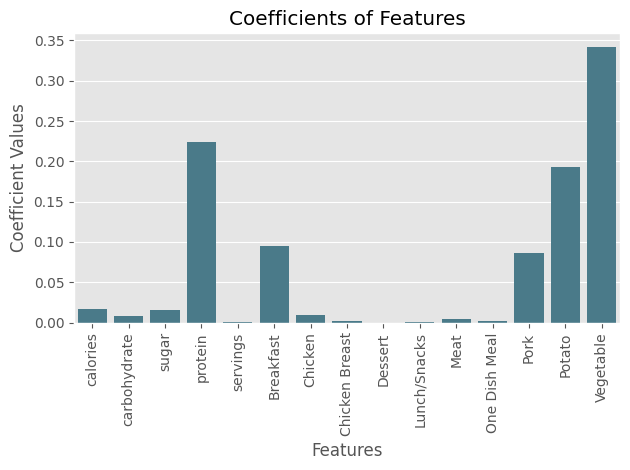

In [114]:
feature_importances = rf_model.feature_importances_
columns = X_train.columns
sns.barplot(x=columns, y=feature_importances)
plt.xlabel("Features")
plt.ylabel("Coefficient Values")
plt.title("Coefficients of Features")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Result of Model Selection**

- In conclusion, I evaluated and made a selection based on 3 criteria in model selection:

1. Precision: We are required to display recipes that are popular with an accuracy of 80% on the website. In other words, we do not want recipes that are not popular to be shown on the website accidentally. I chose the precision metric to minimize misclassification of unpopular recipes as popular because precision measures how many of the recipes predicted as positive by our model are truly positive. It indicates the ratio of recipes predicted as popular to those that are actually popular. This metric aims to reduce the number of false positives, thus helping to minimize the risk of misclassifying unpopular recipes as popular. The formula is TP / (TP + FP).
2. Roc auc score: It measures the overall performance of the model and evaluates the model's ability to correctly distinguish all classes.
3. Feature selection: I compared the features selected by the models during exploratory data analysis with the features I obtained. I determined the categories that are important according to high traffic in order of importance as vegetable, potato, pork, one dish meal, meat, lunch/snacks, dessert, chicken breast, breakfast, chicken, and beverages. I evaluated how well the models captured this ranking. I also observed how the models separated the calories, carbohydrates, sugar, protein and servings features. To better observe this distinction, I evaluated the categories and other features in 2 separate graphs. Since the scoring criteria of the two models are different, I scaled the scoring scores of the models with MinMaxScaler in order to look at the same scale. This process made it easier for me to make comparisons with a more understandable graph.

I aimed to maximize their performances by adjusting the hyperparameters of both models. As a result, both models predicted the task of displaying correct recipes with an precision of over 90%. Since the performances of the two models are very close, it was difficult to make a choice.

1. Precision:
- The precision scores of the Logistic Regression model are 85% on the training set, 84% on the validation set, and 91% on the final test set. The small differences between them are acceptable and balanced. The model has demonstrated the expected performance. Looking at the confusion matrix, 82 true positives and 8 false positives are predicted for recipes.
- The precision scores of the Random Forest Classifier model are 88% on the training set, 84% on the validation set, and 93% on the final test set. A higher score is obtained compared to logistic regression. Looking at the confusion matrix, 53 true positives and 4 false positives are predicted for recipes. The number of true positives is lower than logistic regression.

2. Roc auc score:
- The roc auc scores of the Logistic Regression model on the final test set is 79%. 
- The roc auc scores of the Random Forest Classifier model on the final test set is 80%. It appears slightly higher than logistic regression.

3. Feature Selection:
The Logistic Regression model largely captures the ordering of categorical features that I obtained during exploratory data analysis. Although the random forest classifier model detects the first 3 categories in the same way, it is not as successful as logistic regression in this regard. It also seems that it gave high marks to the breakfast category. If we look at other features, both models have been revealed that low sugar and high protein recipes are preferred.

If I needed to choose a balanced model that better separates positive recipes, logistic regression would be a more appropriate choice. But what our business problem requires from us is to display recipes with high traffic on the website and to minimize the display of wrong recipes. For this reason, I chose the random forest classifier model, which comes first in the first 2 criteria.

**Model performance metrics**

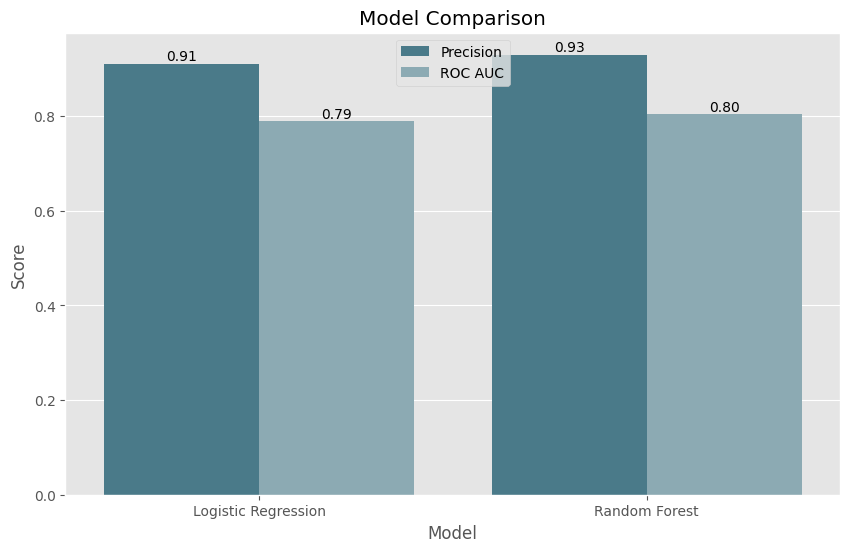

In [72]:
scores_data = {
    "Model": ["Logistic Regression"] * 2 + ["Random Forest"] * 2,
    "Metric": ["Precision", "ROC AUC"] * 2,
    "Score": [lr_final_test_precision_score, lr_final_roc_auc_score, rf_final_test_precision_score, rf_final_test_roc_auc_score]
}
scores_df = pd.DataFrame(scores_data)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Model", y="Score", hue="Metric", data=scores_df)
for container in ax.containers:
    ax.bar_label(container, fmt='%0.2f', label_type="edge")
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(loc="upper center")
plt.show()

**Seperation of the features for plot the graph**

In [82]:
feature_dict = {"Features":X_train.columns,"Logistic Regression Features": coef_values, "Random Forest Importances": feature_importances}

In [83]:
# Categorical Features
models_features_cat_df = pd.DataFrame(feature_dict)
models_features_cat_df.set_index("Features",inplace=True)
# i want to get only categorical features so i dropped other features.
models_features_cat_df.drop(["calories", "carbohydrate", "sugar", "protein","servings"],axis=0, inplace=True)
# i reindex the categories according to EDA stage that i obtained from the graph.
models_features_cat_df= models_features_cat_df.reindex(["Vegetable", "Potato", "Pork", "One Dish Meal", "Meat", "Lunch/Snacks", "Dessert", "Chicken Breast", "Breakfast", "Chicken"])

scaler_eda = MinMaxScaler()
models_features_cat_df_scaled =scaler_eda.fit_transform(models_features_cat_df)
df_scaled_cat = pd.DataFrame(models_features_cat_df_scaled, columns=models_features_cat_df.columns, index=models_features_cat_df.index)

In [84]:
# Other Features
models_features_num_df = pd.DataFrame(feature_dict)
models_features_num_df.set_index("Features",inplace=True)
#i dropped categorical features for taking other features
models_features_num_df.drop(["Vegetable", "Potato", "Pork", "One Dish Meal", "Meat", "Lunch/Snacks", "Dessert", "Chicken Breast", "Breakfast", "Chicken"],axis=0, inplace=True)

scaler_num = MinMaxScaler()
models_features_num_df_scaled =scaler_num.fit_transform(models_features_num_df)
df_scaled_num = pd.DataFrame(models_features_num_df_scaled, columns=models_features_num_df.columns, index=models_features_num_df.index)

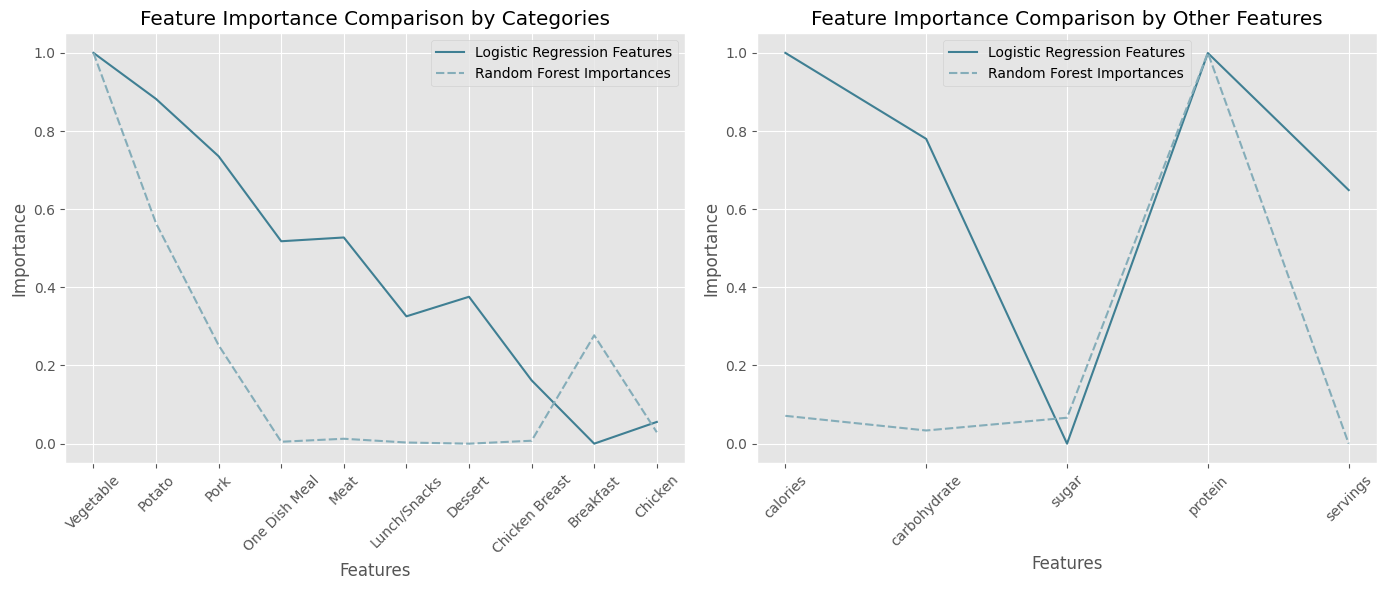

In [98]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
ax1 = sns.lineplot(df_scaled_cat,ax=ax1)
ax1.set_title("Feature Importance Comparison by Categories")
ax1.set_xlabel("Features")
ax1.set_ylabel("Importance")
ax1.tick_params(axis="x",rotation=45)

ax2 = sns.lineplot(df_scaled_num,ax=ax2)
ax2.set_title("Feature Importance Comparison by Other Features")
ax2.set_xlabel("Features")
ax2.set_ylabel("Importance")
ax2.tick_params(axis="x",rotation=45)
plt.tight_layout()
plt.show()

**Evaluate by Business Criteria**

Our business criteria is predict which recipes will be popular 80% of the time and minimize the chance of showing unpopular recipes. In other words, unpopular recipes are not wanted to be displayed on the website. To reveal this situation, a KPI named FPR was created and the FP rate of models were calculated.

Formula:
FPR = FP / Sum of all Confusion Matrix Values

- Logistic Regression:
False Positive = 8
Sum of all Confusion Matrix Values = 224 (82 TN + 82 TP + 52 FN + 8 FP)

False Positive Rate = (8 / 224) * 100 = 3.57%

- Random Forest Classifier:
False Positive = 4
Sum of all Confusion Matrix Values = 224 (86 TN + 53 TP + 81 FN + 4 FP)

False Positive Rate = (4 / 224) * 100 = 1.79%

In this way, the false positive rate of the Logistic Regression model is 3.57% and the Random Forest model is 1.79%. This shows that the Random Forest model produces less undesirable false positive results.


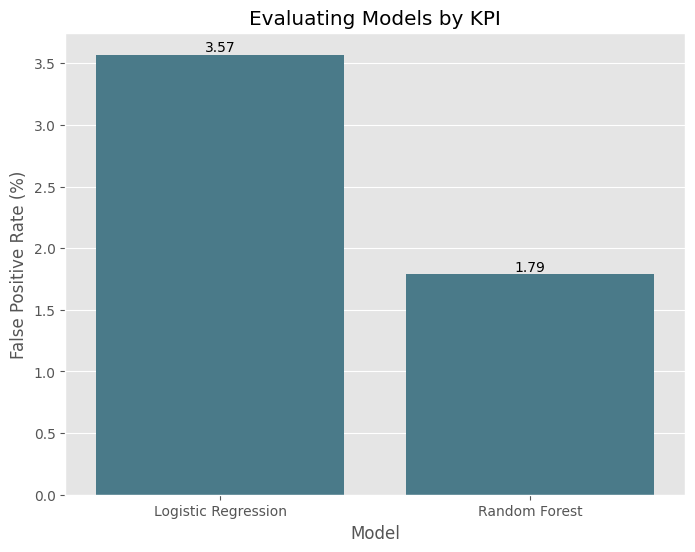

In [441]:
models = ["Logistic Regression", "Random Forest"]
false_positive_rates = [3.57, 1.79] 
kpi_data = {"Models":models, "False Positive Rates":false_positive_rates}
kpi_df = pd.DataFrame(kpi_data)

plt.figure(figsize=(8, 6))
ax=sns.barplot(x="Models", y="False Positive Rates", data=kpi_df)

for container in ax.containers:
    ax.bar_label(container)

plt.title("Evaluating Models by KPI")
plt.ylabel("False Positive Rate (%)")
plt.xlabel("Model")
plt.show()


**Recommendation**

- Data Verification:
  - One more category than the category names specified in the data dictionary was detected. The name of this category is chicken breast.
  - Inconsistent records detected in the sevings variable.
  - Missing data that occurred simultaneously in some periods in the variables calories, carbohydrate, sugar and protein were detected. When looked at on a categorical basis, there is no missing data in the beverages and breakfast categories.
  - When we calculated the records according to the 4-9-4 system calorie formula, which is frequently used in the world, it was observed that 357 data did not comply with this formulation.
  - All this information shows that you need to determine whether you have systemic problems and that your data collection processes need to be reconsidered. Success depends on how clean and reliable the data is.

- Factors causing high traffic:
  - The most demanded categories in the data set are vegetable, potato, pork, one dish meal, meat, lunch and snacks and finally dessert categories, respectively.
  - The most demanded servings category is the one for 4 people. It shows that these recipes are mostly preferred by families of 4 people.
  - When we look at other variables, we show that recipes containing low sugar and high protein are also in demand.
  - If you take these into consideration when preparing your recipes, you will achieve more successful results.

- Model:
  - You can apply the Random Forest Classifier model to select recipes that will provide high traffic on the website. The model produces recipes that are accurate with a very high rate of 93%.
   will show. In other words, the rate of showing recipes that will not provide high traffic in the general recipe data set is as low as 1.79%.

  - To better understand whether the model is successful. I recommend that the users on the website be divided into two groups, without the model and with the model and run A/B testing.

  - After identifying the problems that cause missing data and re-evaluating the inconsistent records, if you prepare a balanced data(%50 high records, %50 normal records) in the high traffic variable and send it to us, we can do another study. I think we will get much better results.
  